# ROE-Ruin Efficient Frontier Visualization Demo

This notebook demonstrates the ROE-Ruin Efficient Frontier visualization, which shows the Pareto frontier of trade-offs between Return on Equity (ROE) and Ruin Probability for companies of different sizes.

## Key Features:
- Multiple company size comparisons ($1M, $10M, $100M)
- Sweet spot detection using knee point analysis
- Optimal zone visualization
- Export support for web (150 DPI) and print (300 DPI)

In [1]:
# Standard imports
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Add the parent directory to the path for imports
sys.path.insert(0, os.path.abspath('../..'))

# Import the visualization function
from ergodic_insurance.visualization.executive_plots import plot_roe_ruin_frontier

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Generate Sample Optimization Results

In a real scenario, these would come from running the Pareto optimization algorithms. Here we'll create synthetic data that represents typical efficient frontiers for different company sizes.

In [2]:
def generate_pareto_frontier(company_size, n_points=15):
    """Generate synthetic Pareto frontier data for a given company size."""
    
    # Base parameters vary by company size
    if company_size == 1e6:  # $1M company - higher risk tolerance
        roe_range = (0.05, 0.22)
        ruin_range = (0.008, 0.10)
    elif company_size == 1e7:  # $10M company - moderate risk
        roe_range = (0.04, 0.16)
        ruin_range = (0.005, 0.06)
    else:  # $100M company - conservative
        roe_range = (0.03, 0.12)
        ruin_range = (0.003, 0.04)
    
    # Generate points along a curved frontier
    t = np.linspace(0, 1, n_points)
    
    # ROE increases linearly
    roe = roe_range[0] + (roe_range[1] - roe_range[0]) * t
    
    # Ruin probability decreases exponentially (typical Pareto curve)
    ruin = ruin_range[1] * np.exp(-3 * t) + ruin_range[0]
    
    # Add some realistic noise
    roe += np.random.normal(0, 0.003, n_points)
    ruin += np.random.normal(0, 0.001, n_points)
    
    # Ensure values stay in valid ranges
    roe = np.clip(roe, 0.01, 0.30)
    ruin = np.clip(ruin, 0.001, 0.15)
    
    return pd.DataFrame({
        'roe': roe,
        'ruin_prob': ruin,
        'company_size': company_size
    })

# Generate data for different company sizes
results_1m = generate_pareto_frontier(1e6)
results_10m = generate_pareto_frontier(1e7)
results_100m = generate_pareto_frontier(1e8)

# Combine into a dictionary (one format the function accepts)
optimization_results = {
    1e6: results_1m,
    1e7: results_10m,
    1e8: results_100m
}

print("Sample data generated:")
for size, df in optimization_results.items():
    print(f"  ${size:,.0f} company: {len(df)} points")
    print(f"    ROE range: {df['roe'].min():.1%} - {df['roe'].max():.1%}")
    print(f"    Ruin prob range: {df['ruin_prob'].min():.2%} - {df['ruin_prob'].max():.2%}")

Sample data generated:
  $1,000,000 company: 15 points
    ROE range: 5.1% - 21.5%
    Ruin prob range: 1.27% - 10.74%
  $10,000,000 company: 15 points
    ROE range: 3.8% - 15.6%
    Ruin prob range: 0.90% - 6.43%
  $100,000,000 company: 15 points
    ROE range: 2.9% - 11.8%
    Ruin prob range: 0.49% - 4.38%


## 2. Basic ROE-Ruin Frontier Visualization

Let's start with the default visualization showing all features.

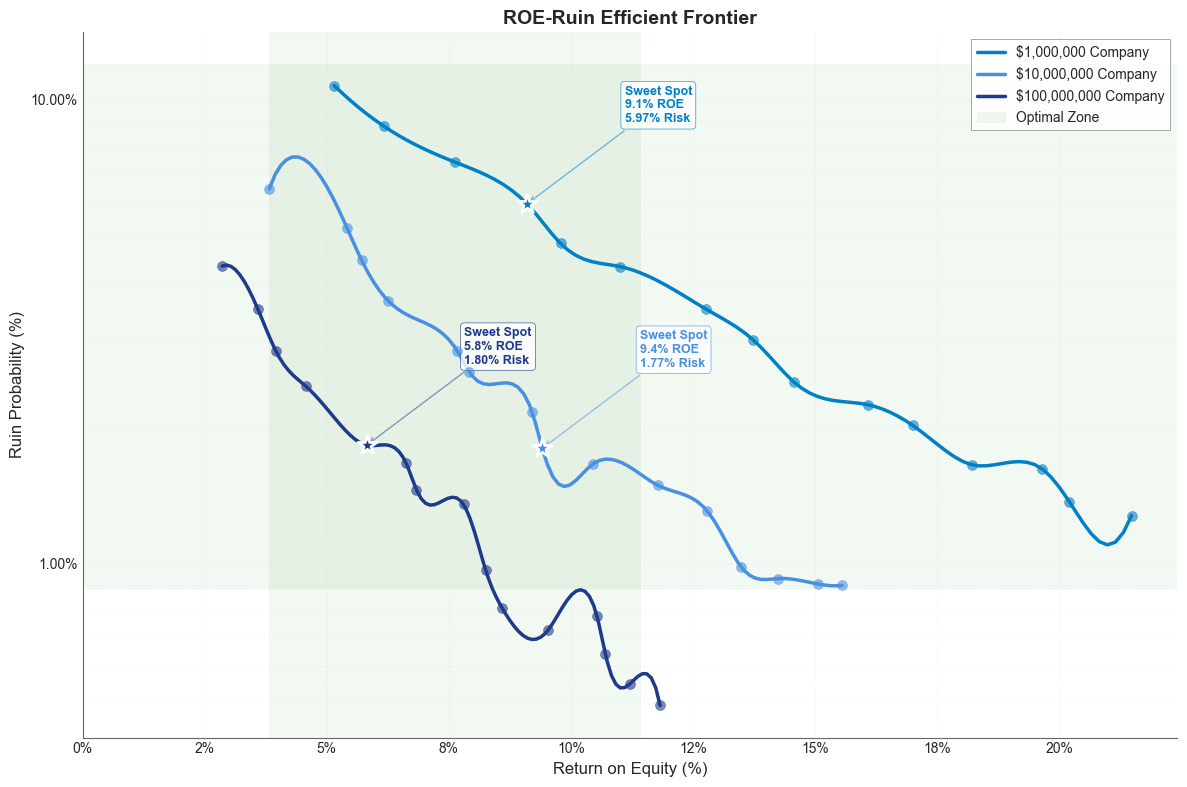

Key features shown:
- Separate curves for each company size
- Sweet spots (star markers) showing optimal trade-offs
- Annotations with ROE and risk values
- Log scale on Y-axis for better visibility of low probabilities
- Grid lines for easy reading
- Optimal zones (green shading) indicating recommended operating regions


In [3]:
# Create the basic plot with all default features
fig = plot_roe_ruin_frontier(optimization_results)
plt.show()

print("Key features shown:")
print("- Separate curves for each company size")
print("- Sweet spots (star markers) showing optimal trade-offs")
print("- Annotations with ROE and risk values")
print("- Log scale on Y-axis for better visibility of low probabilities")
print("- Grid lines for easy reading")
print("- Optimal zones (green shading) indicating recommended operating regions")

## 3. Customized Visualization Options

Let's explore different customization options.

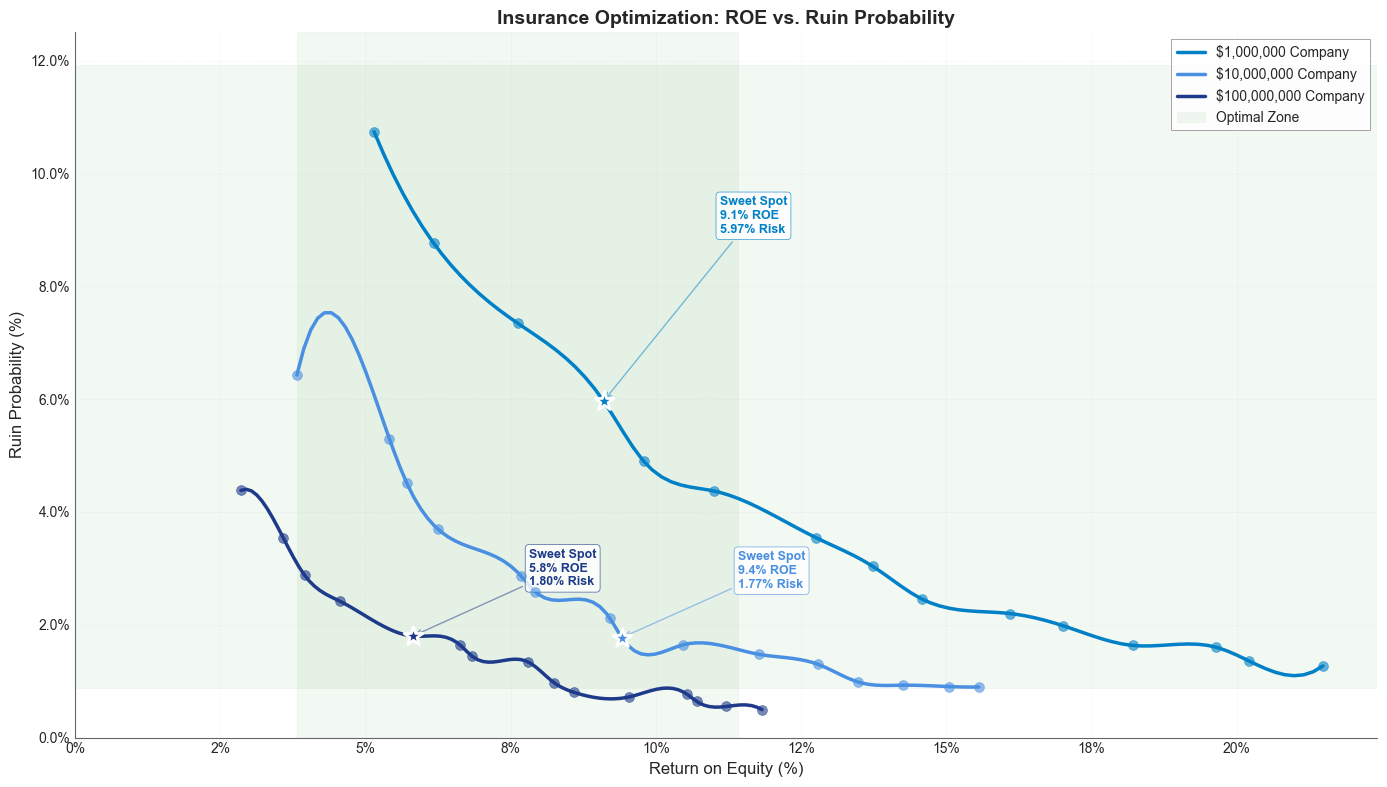

Linear scale makes relative differences more apparent


In [4]:
# Linear scale version (better for presentations)
fig = plot_roe_ruin_frontier(
    optimization_results,
    title="Insurance Optimization: ROE vs. Ruin Probability",
    log_scale_y=False,
    figsize=(14, 8)
)
plt.show()

print("Linear scale makes relative differences more apparent")

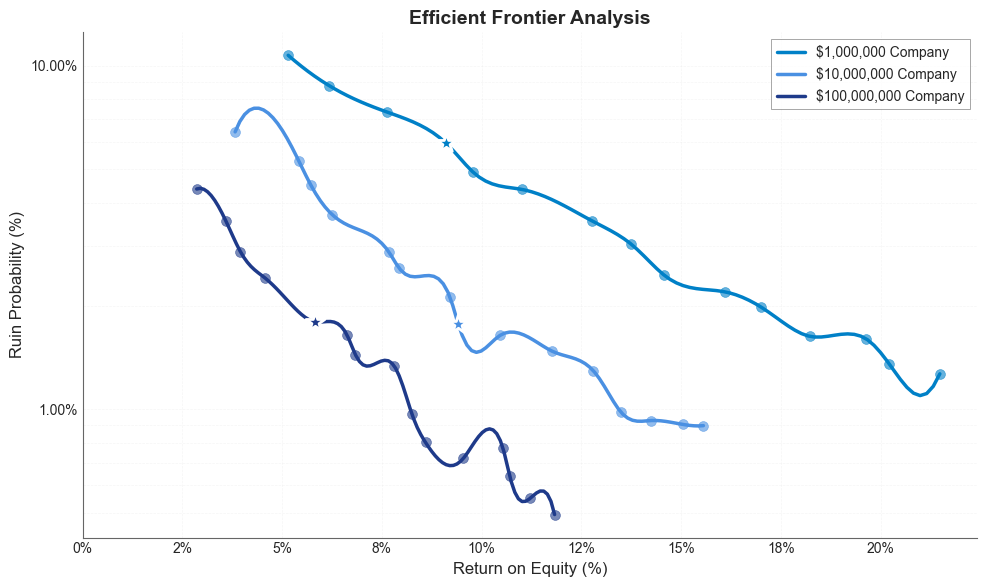

Clean version suitable for formal reports


In [5]:
# Simplified version without annotations (cleaner for reports)
fig = plot_roe_ruin_frontier(
    optimization_results,
    title="Efficient Frontier Analysis",
    annotations=False,
    show_optimal_zones=False,
    figsize=(10, 6)
)
plt.show()

print("Clean version suitable for formal reports")

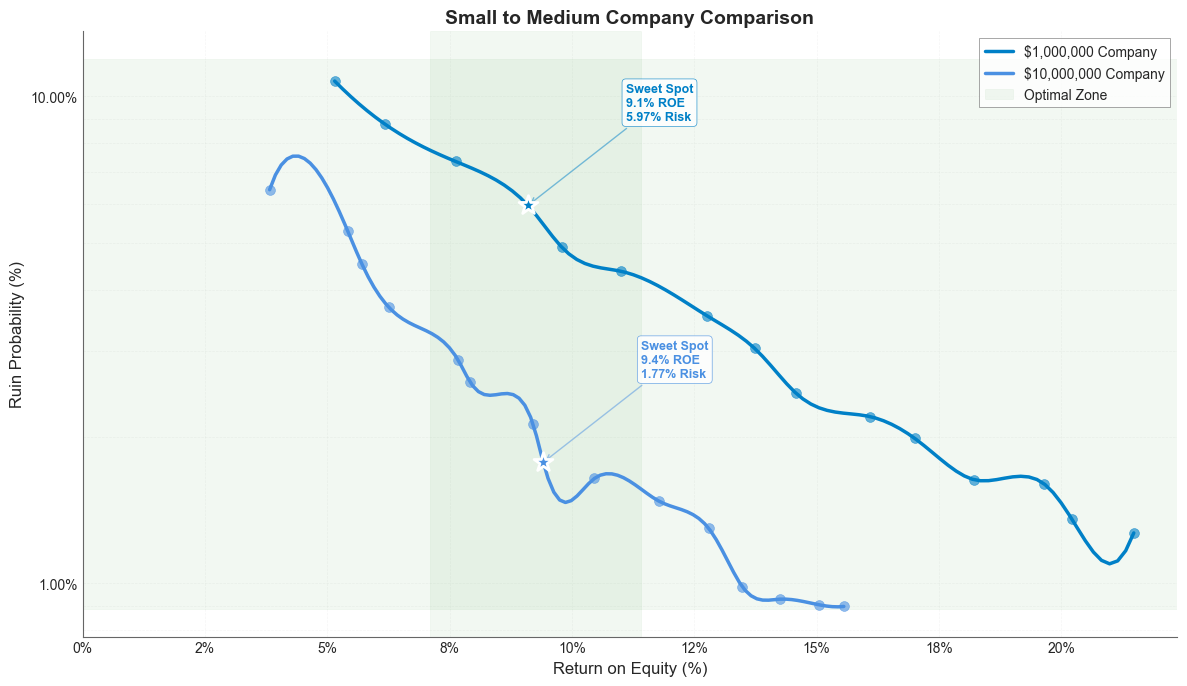

Focused comparison of specific company sizes


In [6]:
# Focus on specific company sizes
fig = plot_roe_ruin_frontier(
    optimization_results,
    company_sizes=[1e6, 1e7],  # Only $1M and $10M
    title="Small to Medium Company Comparison",
    figsize=(12, 7)
)
plt.show()

print("Focused comparison of specific company sizes")

## 4. Alternative Data Input Format

The function also accepts a single DataFrame with a 'company_size' column.

Combined DataFrame shape: (45, 3)
Columns: ['roe', 'ruin_prob', 'company_size']

First few rows:
        roe  ruin_prob  company_size
0  0.051490   0.107438     1000000.0
1  0.061728   0.087699     1000000.0
2  0.076229   0.073458     1000000.0
3  0.090998   0.059671     1000000.0
4  0.097869   0.049025     1000000.0


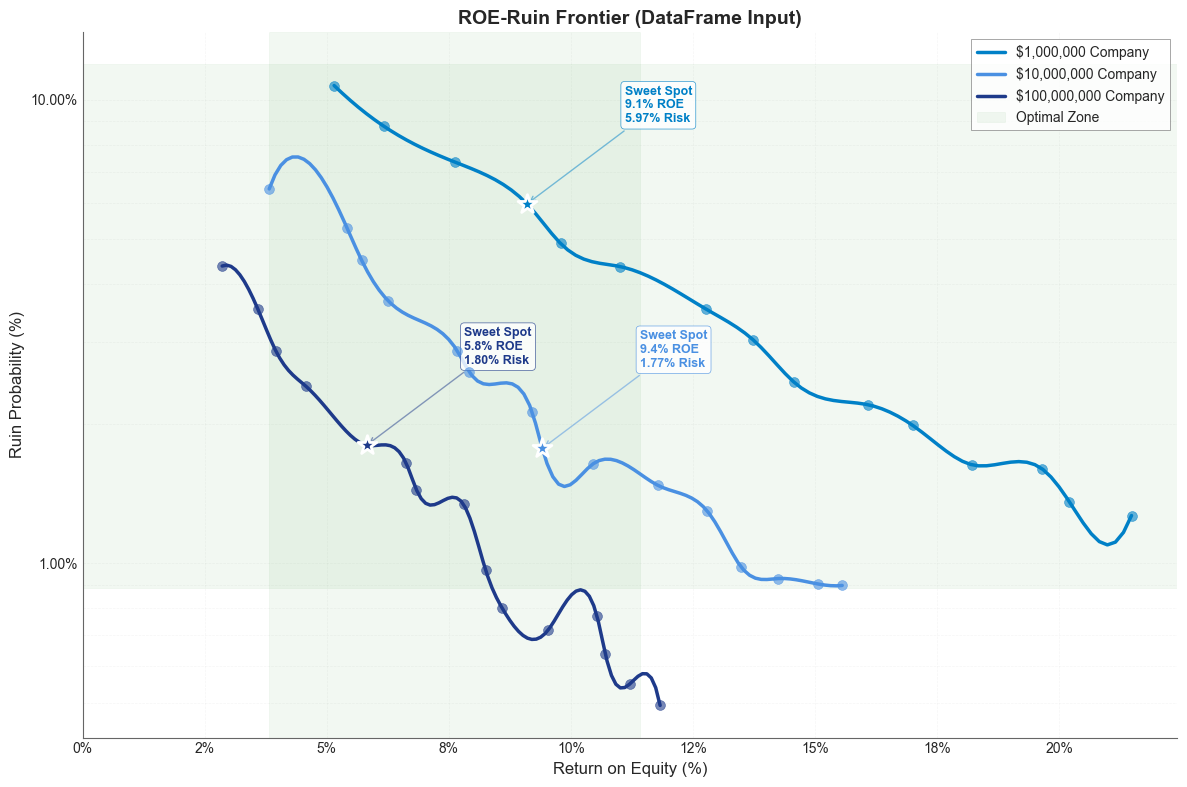

In [7]:
# Combine all data into a single DataFrame
all_results = pd.concat([
    results_1m.assign(company_size=1e6),
    results_10m.assign(company_size=1e7),
    results_100m.assign(company_size=1e8)
], ignore_index=True)

print(f"Combined DataFrame shape: {all_results.shape}")
print(f"Columns: {list(all_results.columns)}")
print(f"\nFirst few rows:")
print(all_results.head())

# Plot using single DataFrame format
fig = plot_roe_ruin_frontier(
    all_results,
    title="ROE-Ruin Frontier (DataFrame Input)"
)
plt.show()

## 5. Custom Color Schemes

For presentations or branding purposes, you can customize the color scheme.

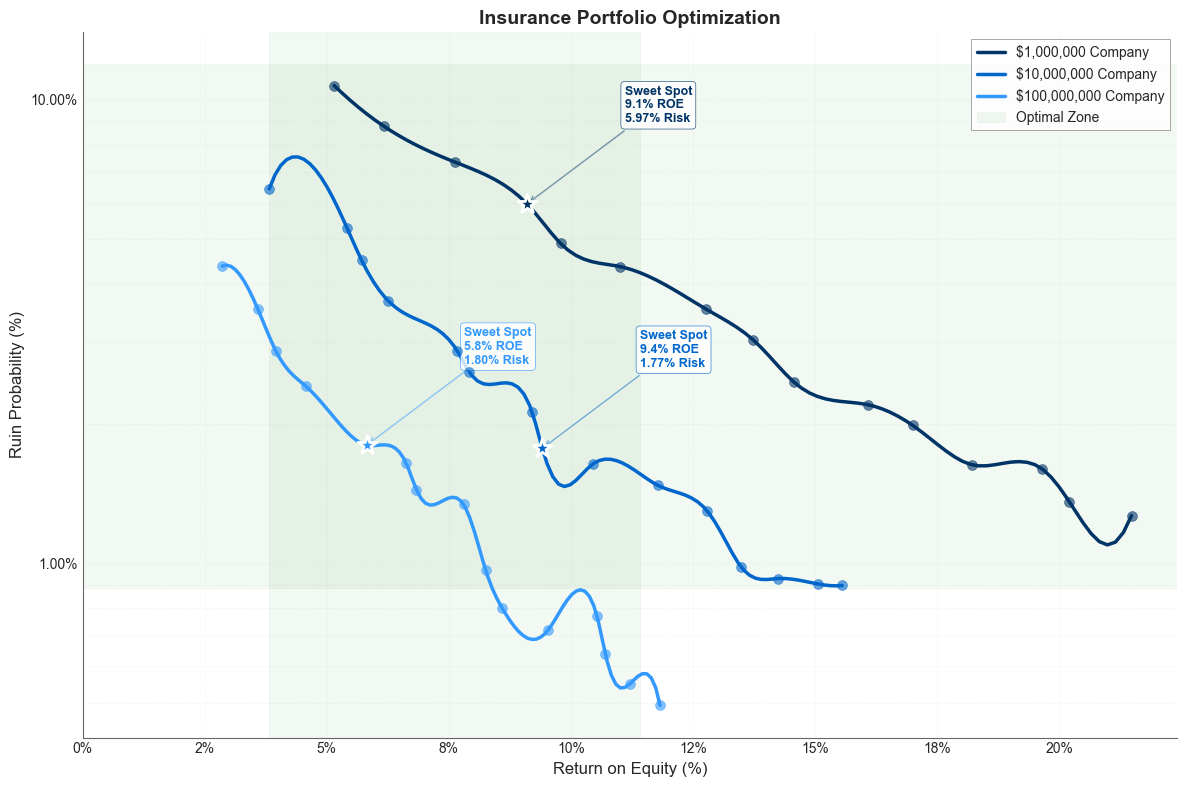

Custom color scheme applied


In [8]:
# Corporate color scheme
corporate_colors = ['#003366', '#0066CC', '#3399FF']  # Dark to light blue

fig = plot_roe_ruin_frontier(
    optimization_results,
    title="Insurance Portfolio Optimization",
    color_scheme=corporate_colors,
    figsize=(12, 8)
)
plt.show()

print("Custom color scheme applied")

## 6. Export for Different Media

The visualization can be exported at different resolutions for various uses.

In [9]:
# Create output directory if it doesn't exist
output_dir = Path('../results/visualizations')
output_dir.mkdir(parents=True, exist_ok=True)

# Web resolution (150 DPI)
fig_web = plot_roe_ruin_frontier(
    optimization_results,
    title="ROE-Ruin Efficient Frontier",
    export_dpi=150
)
web_path = output_dir / 'roe_ruin_frontier_web.png'
fig_web.savefig(web_path, dpi=150, bbox_inches='tight')
plt.close(fig_web)
print(f"Web version saved to: {web_path}")

# Print resolution (300 DPI)
fig_print = plot_roe_ruin_frontier(
    optimization_results,
    title="ROE-Ruin Efficient Frontier",
    export_dpi=300
)
print_path = output_dir / 'roe_ruin_frontier_print.png'
fig_print.savefig(print_path, dpi=300, bbox_inches='tight')
plt.close(fig_print)
print(f"Print version saved to: {print_path}")

# Vector format for publications
fig_vector = plot_roe_ruin_frontier(
    optimization_results,
    title="ROE-Ruin Efficient Frontier"
)
vector_path = output_dir / 'roe_ruin_frontier.pdf'
fig_vector.savefig(vector_path, format='pdf', bbox_inches='tight')
plt.close(fig_vector)
print(f"Vector version saved to: {vector_path}")

Web version saved to: ..\results\visualizations\roe_ruin_frontier_web.png


Print version saved to: ..\results\visualizations\roe_ruin_frontier_print.png


Vector version saved to: ..\results\visualizations\roe_ruin_frontier.pdf


## 7. Analyzing Sweet Spots

The sweet spots represent the knee points where the trade-off between ROE and ruin probability is most favorable.

In [10]:
# Let's manually identify the sweet spots from our data
from ergodic_insurance.visualization.executive_plots import _find_knee_point

print("Sweet Spot Analysis:")
print("="*50)

for size, df in optimization_results.items():
    # Sort by ROE
    df_sorted = df.sort_values('roe')
    roe_vals = df_sorted['roe'].values
    ruin_vals = df_sorted['ruin_prob'].values
    
    # Find knee point
    knee_idx = _find_knee_point(roe_vals, ruin_vals)
    
    sweet_roe = roe_vals[knee_idx]
    sweet_ruin = ruin_vals[knee_idx]
    
    print(f"\n${size:,.0f} Company:")
    print(f"  Sweet Spot ROE: {sweet_roe:.1%}")
    print(f"  Sweet Spot Ruin Prob: {sweet_ruin:.2%}")
    print(f"  Risk-Return Ratio: {sweet_roe/sweet_ruin:.1f}")

print("\n" + "="*50)
print("The sweet spots indicate the optimal insurance purchase levels")
print("where marginal improvements in ROE come at acceptable risk increases.")

Sweet Spot Analysis:

$1,000,000 Company:
  Sweet Spot ROE: 9.1%
  Sweet Spot Ruin Prob: 5.97%
  Risk-Return Ratio: 1.5

$10,000,000 Company:
  Sweet Spot ROE: 9.4%
  Sweet Spot Ruin Prob: 1.77%
  Risk-Return Ratio: 5.3

$100,000,000 Company:
  Sweet Spot ROE: 5.8%
  Sweet Spot Ruin Prob: 1.80%
  Risk-Return Ratio: 3.2

The sweet spots indicate the optimal insurance purchase levels
where marginal improvements in ROE come at acceptable risk increases.


## 8. Integration with Real Optimization Results

In practice, this visualization would be used with actual optimization results from the Pareto frontier analysis.

In [11]:
# Example of how to integrate with actual optimization pipeline
print("Integration with Optimization Pipeline:")
print("="*50)
print()
print("# Step 1: Run Pareto optimization")
print("from ergodic_insurance.pareto_frontier import ParetoFrontier")
print("from ergodic_insurance.business_optimizer import BusinessOptimizer")
print()
print("# Step 2: Extract results for each company size")
print("results = {}")
print("for company_size in [1e6, 1e7, 1e8]:")
print("    optimizer = BusinessOptimizer(initial_assets=company_size)")
print("    pareto_points = optimizer.find_pareto_frontier()")
print("    results[company_size] = pareto_points.to_dataframe()")
print()
print("# Step 3: Visualize")
print("fig = plot_roe_ruin_frontier(results)")
print()
print("="*50)

Integration with Optimization Pipeline:

# Step 1: Run Pareto optimization
from ergodic_insurance.pareto_frontier import ParetoFrontier
from ergodic_insurance.business_optimizer import BusinessOptimizer

# Step 2: Extract results for each company size
results = {}
for company_size in [1e6, 1e7, 1e8]:
    optimizer = BusinessOptimizer(initial_assets=company_size)
    pareto_points = optimizer.find_pareto_frontier()
    results[company_size] = pareto_points.to_dataframe()

# Step 3: Visualize
fig = plot_roe_ruin_frontier(results)



## Summary

The ROE-Ruin Efficient Frontier visualization provides:

1. **Clear Trade-off Visualization**: Shows the Pareto frontier between returns and risk
2. **Company Size Comparison**: Enables comparison across different scales of business
3. **Decision Support**: Sweet spots help identify optimal insurance purchasing levels
4. **Flexible Customization**: Adapts to different presentation needs
5. **Export Options**: Supports web, print, and vector formats

This tool is essential for executives and actuaries making strategic insurance purchasing decisions.